In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx

pd.set_option('display.max_columns', 100)

In [2]:
# y_target = pd.read_csv('../data/05_model_input/y_training.csv')

In [3]:
# y_target.loc[y_target['duration'] < 1e4]

In [5]:
df_training = pd.read_pickle('../data/05_model_input/df_training.pkl').sample(50)
df_training.sample(5)

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_datetime_hour
2287636,2.0,2023-02-23 16:36:50,1.0,0.93,1.0,N,234.0,113.0,1.0,7.2,2.5,0.5,1.00,0.0,1.0,14.70,2.5,0.0,16
1924924,2.0,2023-03-18 17:50:55,1.0,0.93,1.0,N,48.0,186.0,2.0,9.3,0.0,0.5,0.00,0.0,1.0,13.30,2.5,0.0,17
2652485,2.0,2023-01-28 11:13:51,1.0,1.24,1.0,N,140.0,262.0,1.0,7.2,0.0,0.5,1.00,0.0,1.0,12.20,2.5,0.0,11
960470,2.0,2023-03-09 20:41:44,1.0,3.31,1.0,N,75.0,230.0,2.0,19.8,1.0,0.5,0.00,0.0,1.0,24.80,2.5,0.0,20
1507628,1.0,2023-01-17 10:14:47,1.0,2.30,1.0,N,229.0,234.0,1.0,14.9,2.5,0.5,3.75,0.0,1.0,22.65,2.5,0.0,10


In [2]:
gdf = gpd.read_file("../data/01_raw/taxi_zones/taxi_zones.shp")

In [3]:
gdf = gdf.to_crs(4326)

In [4]:
gdf['rep_point'] = gdf['geometry'].representative_point()
gdf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,rep_point
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",POINT (-74.17678 40.68952)
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",POINT (-73.82614 40.62572)
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",POINT (-73.84948 40.86587)
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",POINT (-73.97702 40.72415)
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",POINT (-74.18994 40.55034)
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",POINT (-73.85640 40.89908)
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",POINT (-73.90371 40.74679)
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",POINT (-74.01292 40.70898)
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",POINT (-73.94583 40.77654)


In [18]:
# df_training = df_training.merge(gdf, left_on='PULocationID', right_on='LocationID')
# df_training.sample(3)

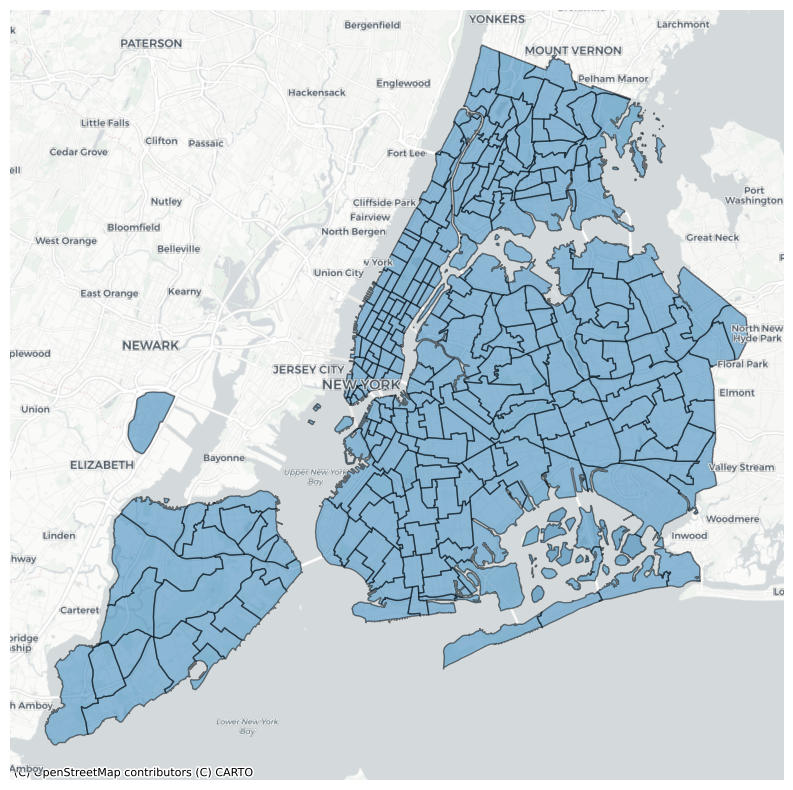

In [19]:
# ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronOnlyLabels)
ax.set_axis_off()

In [20]:
df_training_dayofweek_hour = pd.read_pickle("../data/08_reporting/df_training_group_dayofweek_hour.pkl")

In [21]:
df_training_dayofweek_hour.reset_index(drop=False)

,date_dayofweek,date_hour,n_trips,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,0,18860,132.0,48.0,1.0,5.844916,1.0,25.668667,1.880570,0.5,4.239695,0.887523,1.0,35.846238,1.909639,0.348530
1,0,1,9420,132.0,48.0,1.0,5.362507,1.0,23.924934,1.622329,0.5,3.870801,0.686649,1.0,33.237256,1.980131,0.257213
2,0,2,5294,48.0,48.0,1.0,4.116549,1.0,19.532080,1.507509,0.5,2.992323,0.368298,1.0,27.492852,2.127069,0.103700
3,0,3,3805,48.0,48.0,1.0,6.197816,1.0,21.723740,1.526741,0.5,3.272352,0.763028,1.0,30.351748,2.068848,0.092390
4,0,4,3973,48.0,138.0,1.0,8.622522,1.0,26.711666,1.694080,0.5,3.882872,1.532862,1.0,36.792119,1.950519,0.070735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,6,19,59261,132.0,236.0,1.0,5.199605,1.0,19.910664,0.925008,0.5,3.579543,0.680358,1.0,28.355299,2.226222,0.176505
164,6,20,52432,132.0,236.0,1.0,4.297162,1.0,20.383662,1.774549,0.5,3.821396,0.687072,1.0,29.936610,2.212650,0.194895
165,6,21,49935,132.0,236.0,1.0,4.591779,1.0,21.782410,1.883863,0.5,4.045401,0.750738,1.0,31.746217,2.163092,0.239071
166,6,22,43639,132.0,48.0,1.0,5.382296,1.0,23.223301,1.832362,0.5,4.156540,0.791684,1.0,33.271166,2.092356,0.277215


In [8]:
import datetime

beg_specific_week = '2023-03-13'
pd.to_datetime(beg_specific_week).date() + datetime.timedelta(days=7)

datetime.date(2023, 3, 20)

In [6]:
gdf = gpd.read_file('../data/08_reporting/df_training_group_dayofweek_hour_w_geo.geojson')

In [7]:
gdf

,date_dayofweek,PULocationID,date_hour,n_trips,DOLocationID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,0,1.0,4,1,1.0,1.0,0.000000,1.0,95.000000,0.000000,0.00,19.200000,0.000000,1.00,115.200000,0.0,0.0,1.0,0.116357,0.000782,Newark Airport,1.0,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,0,1.0,6,3,1.0,2.0,0.000000,3.0,23.333333,0.000000,0.50,0.000000,0.000000,1.00,23.833333,0.0,0.0,1.0,0.116357,0.000782,Newark Airport,1.0,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
2,0,1.0,8,1,264.0,1.0,0.010000,1.0,120.000000,0.000000,0.00,30.250000,0.000000,1.00,151.250000,0.0,0.0,1.0,0.116357,0.000782,Newark Airport,1.0,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
3,0,1.0,10,3,1.0,3.0,0.053333,2.0,31.666667,0.000000,0.00,3.333333,7.666667,1.00,43.000000,0.0,0.0,1.0,0.116357,0.000782,Newark Airport,1.0,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
4,0,1.0,11,1,1.0,1.0,0.200000,2.0,3.700000,0.000000,0.50,0.000000,0.000000,1.00,5.200000,0.0,0.0,1.0,0.116357,0.000782,Newark Airport,1.0,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,6,265.0,19,6,1.0,1.5,12.020000,1.0,84.893333,0.000000,0.00,5.638333,2.125000,1.00,93.590000,0.0,0.0,NaN,NaN,NaN,None,NaN,None,None
17044,6,265.0,20,3,265.0,1.0,1.023333,1.0,125.850000,0.000000,0.00,15.966667,0.000000,1.00,142.983333,0.0,0.0,NaN,NaN,NaN,None,NaN,None,None
17045,6,265.0,21,3,265.0,1.0,0.236667,1.0,180.000000,0.000000,0.00,21.733333,0.000000,1.00,202.733333,0.0,0.0,NaN,NaN,NaN,None,NaN,None,None
17046,6,265.0,22,2,265.0,1.0,10.190000,1.0,69.320000,0.000000,0.25,0.000000,0.000000,0.65,70.220000,0.0,0.0,NaN,NaN,NaN,None,NaN,None,None


In [2]:
df = pd.read_pickle('../data/08_reporting/df_training_group_location_datetime.pkl')

In [3]:
df

,PULocationID,pickup_day,pickup_hour,n_trips,DOLocationID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_datetime,LocationID,zone,borough
0,1.0,2022-10-24,17,1,1.0,1.0,0.000000,2.0,120.000000,0.000000,0.0,0.000000,0.000000,0.3,120.300000,0.000000,0.0,2022-10-24 17:00:00,1,Newark Airport,EWR
1,1.0,2022-10-25,3,1,1.0,1.0,0.020000,1.0,115.000000,0.000000,0.0,5.000000,0.000000,0.3,120.300000,0.000000,0.0,2022-10-25 03:00:00,1,Newark Airport,EWR
2,1.0,2023-01-01,5,1,1.0,2.0,0.000000,1.0,116.000000,0.000000,0.0,1.110000,0.000000,1.0,118.110000,0.000000,0.0,2023-01-01 05:00:00,1,Newark Airport,EWR
3,1.0,2023-01-01,8,1,1.0,2.0,0.000000,1.0,89.000000,0.000000,0.0,10.000000,0.000000,1.0,100.000000,0.000000,0.0,2023-01-01 08:00:00,1,Newark Airport,EWR
4,1.0,2023-01-01,11,1,1.0,4.0,0.000000,1.0,95.000000,0.000000,0.0,19.200000,0.000000,1.0,115.200000,0.000000,0.0,2023-01-01 11:00:00,1,Newark Airport,EWR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208692,263.0,2023-03-31,19,171,141.0,1.0,2.152339,1.0,13.165146,3.137427,0.5,2.900526,0.076608,1.0,22.411287,2.439394,0.0,2023-03-31 19:00:00,263,Yorkville West,Manhattan
208693,263.0,2023-03-31,20,139,141.0,1.0,2.489712,1.0,13.196906,1.636691,0.5,2.721655,0.188489,1.0,20.895540,2.371324,0.0,2023-03-31 20:00:00,263,Yorkville West,Manhattan
208694,263.0,2023-03-31,21,99,141.0,1.0,2.333838,1.0,13.088485,1.606061,0.5,2.882323,0.066162,1.0,20.880404,2.421875,0.0,2023-03-31 21:00:00,263,Yorkville West,Manhattan
208695,263.0,2023-03-31,22,127,141.0,1.0,2.610000,1.0,14.578898,1.389764,0.5,3.114094,0.103937,1.0,22.753622,2.479675,0.0,2023-03-31 22:00:00,263,Yorkville West,Manhattan
